In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, cos, sin, asin, sqrt

In [107]:
df_uber = pd.read_csv('uber.csv')

In [108]:
df_uber.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [109]:
df_uber.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [110]:
df_uber.isna().values.sum()

2

In [111]:
df_uber.dropna(inplace=True)

In [112]:
df_uber.isna().values.sum()

0

In [113]:
df_uber = df_uber[df_uber['pickup_latitude'] < 90]
df_uber = df_uber[df_uber['pickup_latitude'] > -90]
df_uber = df_uber[df_uber['pickup_longitude'] < 180]
df_uber = df_uber[df_uber['pickup_longitude'] > -180]
df_uber = df_uber[df_uber['dropoff_latitude'] < 90]
df_uber = df_uber[df_uber['dropoff_latitude'] > -90]
df_uber = df_uber[df_uber['dropoff_longitude'] < 180]
df_uber = df_uber[df_uber['dropoff_longitude'] > -180]

In [114]:
df_uber.shape

(199987, 9)

In [115]:
pickup_lat = np.radians(df_uber['pickup_latitude'])

In [116]:
pickup_long = np.radians(df_uber['pickup_longitude'])

In [117]:
def distance(lat1, lat2, long1, long2):

    long1 = np.radians(long1)
    long2 = np.radians(long2)
    lat1 = np.radians(lat1)
    lat2 = np.radians(lat2)

    dlon = long2 - long1
    dlat = lat2 - lat1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371

    return (c*r)

In [118]:
uber_distance = distance(df_uber['pickup_latitude'], df_uber['dropoff_latitude'], df_uber['pickup_longitude'], df_uber['dropoff_longitude'])
uber_distance

0          1.683323
1          2.457590
2          5.036377
3          1.661683
4          4.475450
            ...    
199995     0.112210
199996     1.875050
199997    12.850319
199998     3.539715
199999     5.417783
Length: 199987, dtype: float64

In [119]:
df_uber['distance'] = uber_distance

In [120]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199987 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         199987 non-null  int64  
 1   key                199987 non-null  object 
 2   fare_amount        199987 non-null  float64
 3   pickup_datetime    199987 non-null  object 
 4   pickup_longitude   199987 non-null  float64
 5   pickup_latitude    199987 non-null  float64
 6   dropoff_longitude  199987 non-null  float64
 7   dropoff_latitude   199987 non-null  float64
 8   passenger_count    199987 non-null  int64  
 9   distance           199987 non-null  float64
dtypes: float64(6), int64(2), object(2)
memory usage: 16.8+ MB


In [121]:
df_uber.drop(['Unnamed: 0'], axis=1, inplace=True)

In [122]:
df_uber.drop(['key'], axis=1, inplace=True)

In [123]:
df_uber

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450
...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.112210
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.875050
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,12.850319
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,3.539715


In [124]:
#Dropping fare amount having negative value
df_uber.drop(df_uber[df_uber['fare_amount'] < 0].index, inplace=True)

In [125]:
df_uber.drop(['pickup_datetime'], axis=1, inplace=True)

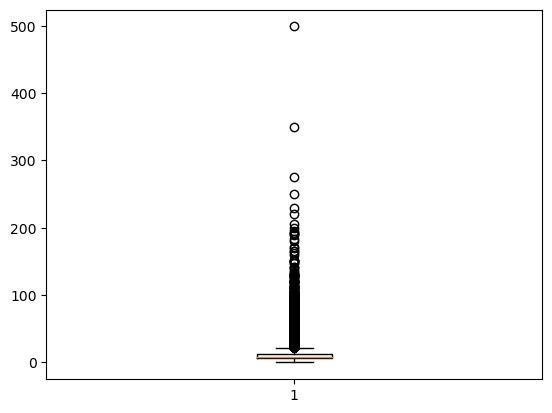

In [126]:
plt.boxplot(df_uber['fare_amount'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2553275dc90>,
 'caps': [<matplotlib.lines.Line2D at 0x255410ec350>,
 'boxes': [<matplotlib.lines.Line2D at 0x2554113e290>],
 'medians': [<matplotlib.lines.Line2D at 0x255410edb10>],
 'fliers': [<matplotlib.lines.Line2D at 0x255410ed550>],
 'means': []}

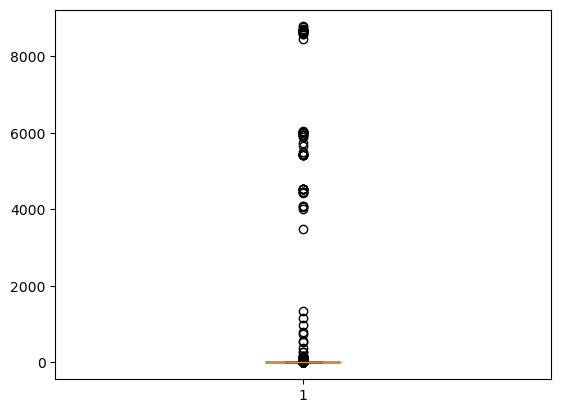

In [127]:
plt.boxplot(df_uber['distance'])

In [128]:
df_uber[df_uber['fare_amount'] > 150]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
4292,350.00,0.000000,0.000000,0.000000,0.000000,3,0.000000
18415,190.00,-73.797236,40.665420,-73.101445,40.812208,1,60.851156
19509,180.00,-73.567558,41.047142,-73.567596,41.047127,1,0.003621
23682,206.38,-73.782161,40.644601,-74.449079,40.836457,1,60.100889
29261,220.00,-73.801147,40.671653,-73.790402,40.646742,1,2.914493
33911,192.33,-73.542097,41.052430,-73.542097,41.052430,2,0.000000
39716,191.80,-73.822978,40.788500,-73.548110,41.045037,1,36.703299
45094,170.00,-73.789297,40.643437,-74.402822,40.698832,1,52.108219
53996,171.35,-74.291586,40.768783,-74.291589,40.768786,1,0.000418
71715,250.00,0.000000,0.000000,0.000000,0.000000,1,0.000000


In [129]:
df_uber[df_uber['distance'] >100]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
346,15.5,0.000000,0.000000,-73.979805,40.786030,1,8666.398012
1067,52.0,-73.781095,40.645015,0.000000,0.000000,1,8647.035598
1526,2.5,-74.001849,40.715156,0.000000,0.000000,3,8666.772408
1945,7.0,-0.131667,40.757063,-73.991593,40.749953,1,6021.114289
2167,5.7,-1.216667,40.748597,-74.004822,40.734670,1,5941.059801
...,...,...,...,...,...,...,...
197863,7.0,-73.962190,40.759158,0.000000,0.000000,1,8664.389119
198567,23.5,-73.968115,40.801455,0.000000,0.000000,2,8665.747167
198665,20.1,-0.116667,40.729775,0.000000,0.000000,5,4528.959683
199403,7.0,-67.370360,39.999790,-73.971058,40.753000,1,565.234582


In [157]:
#let's drop rows having fare amount more than 150 and distance of more than 60 and 0
df_uber.drop(df_uber[df_uber['distance'] == 0].index, inplace = True)
df_uber.drop(df_uber[df_uber['distance'] > 60].index, inplace = True)
df_uber.drop(df_uber[df_uber['fare_amount'] > 100].index, inplace = True)
df_uber.drop(df_uber[df_uber['fare_amount'] < 0].index, inplace=True)
df_uber.drop(df_uber[df_uber['passenger_count'] > 6].index, inplace=True)


In [158]:
df_uber

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,4.475450
...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,0.112210
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1.875050
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,12.850319
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,3.539715


In [159]:
df_uber.shape

(193785, 7)

In [160]:
df_uber.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
fare_amount,1.000000,0.012186,-0.009020,0.010735,-0.008965,0.014657,0.887263
pickup_longitude,0.012186,1.000000,-0.994006,0.999885,-0.993975,0.009756,0.005376
pickup_latitude,-0.009020,-0.994006,1.000000,-0.993995,0.999929,-0.009908,-0.002870
dropoff_longitude,0.010735,0.999885,-0.993995,1.000000,-0.993963,0.009744,0.004484
dropoff_latitude,-0.008965,-0.993975,0.999929,-0.993963,1.000000,-0.009862,-0.002284
passenger_count,0.014657,0.009756,-0.009908,0.009744,-0.009862,1.000000,0.009458
distance,0.887263,0.005376,-0.002870,0.004484,-0.002284,0.009458,1.000000


In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

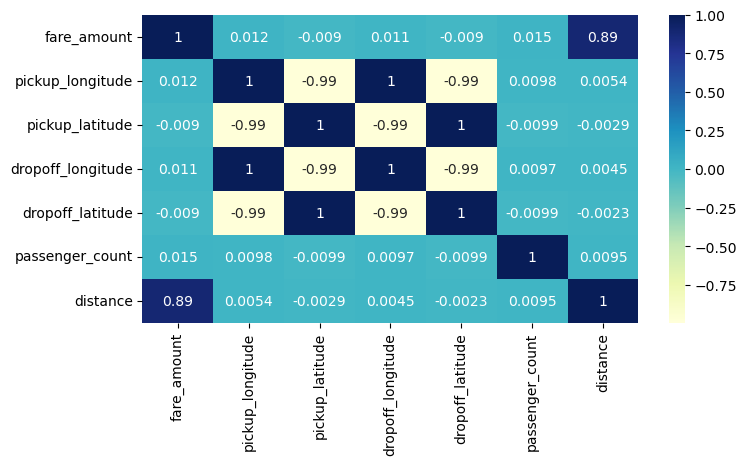

In [162]:
plt.figure(figsize=(8,4))
dataplot = sns.heatmap(df_uber.corr(), cmap="YlGnBu", annot=True)


In [181]:
y = df_uber['fare_amount']
x = df_uber['distance']

In [182]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = np.array(x)
x = x.reshape(-1, 1)
x = scaler.fit_transform(x)

In [183]:
x

array([[-0.46518677],
       [-0.24845502],
       [ 0.47339541],
       ...,
       [ 2.6606628 ],
       [ 0.05445201],
       [ 0.58015811]])

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [185]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [186]:
y_test

160125     6.1
115754     6.9
32382      5.8
128601    30.9
166610    29.0
          ... 
65540      6.0
37512      7.0
153083     7.7
146666     4.1
145494     5.4
Name: fare_amount, Length: 58136, dtype: float64

In [187]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [188]:
y_pred = model.predict(x_test)

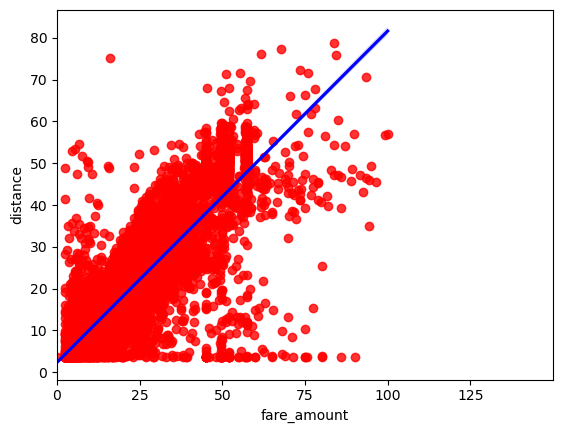

In [192]:
sns.regplot(x=y_test, y=y_pred, color="red", line_kws={'color':'blue'})
plt.xlim(0, 150)
plt.xticks(ticks=range(0,150, 25))
plt.ylabel('distance')
plt.show()

In [193]:
mae_lr = metrics.mean_absolute_error(y_test, y_pred)
mse_lr = metrics.mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)

print(f"Mean Absolute Error: {mae_lr}")
print(f"Mean Squared Error: {mse_lr}")
print(f"Root Mean Squared Error: {rmse_lr}")

Mean Absolute Error: 2.2957675355931246
Mean Squared Error: 17.951127635366035
Root Mean Squared Error: 4.236877108834529


In [194]:
model2 = RandomForestRegressor()
model2.fit(x_train, y_train)

RandomForestRegressor()

In [195]:
y_pred = model2.predict(x_test)

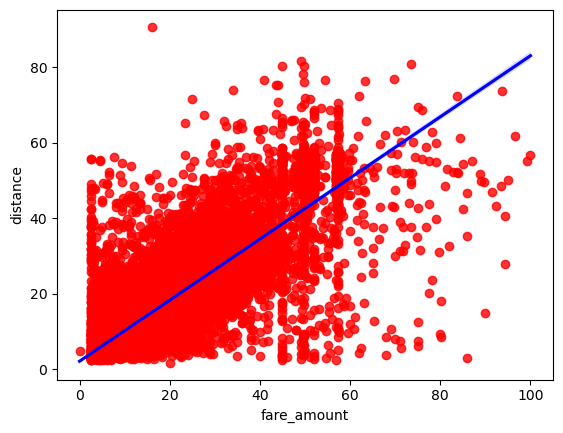

In [197]:
sns.regplot(x=y_test, y=y_pred, color="red", line_kws={"color":"blue"})
plt.ylabel("distance")
plt.show()

In [199]:
mae_rf = metrics.mean_absolute_error(y_test, y_pred)
mse_rf = metrics.mean_squared_error(y_test, y_pred)
rmse_rf = np.sqrt(mse_lr)

print(f"Mean Absolute Error: {mae_rf}")
print(f"Mean Squared Error: {mse_rf}")
print(f"Root Mean Squared Error: {rmse_rf}")

Mean Absolute Error: 2.7944725802226826
Mean Squared Error: 24.915594376228007
Root Mean Squared Error: 4.991552301261403
